# Investigating Fandango Movie Ratings
In 2015, data journalist Walt Hickey suspected that movie ratings site Fandango was inflating their movie ratings. He performed a comparative analysis of Fandango's movie ratings with other sites' ratings and found that they were indeed inflated. His FiveThirtyEight article on his data analysis can be found <a href='https://fivethirtyeight.com/features/fandango-movies-ratings/'>here</a>.

Today I will discover if there has been a change in Fandango's rating system since after Hickey's analysis.

The question I intend to answer in this analysis is:<br/>
Did Fandango's movie rating system change after 2015?

I will use a datset of 2015 Fandango movie ratings found on FiveThirtyEight's Github <a href='https://github.com/fivethirtyeight/data/tree/master/fandango'>here</a> and a dataset of several movie rating sites' 2016-2017 movie ratings found on Github <a href='https://github.com/mircealex/Movie_ratings_2016_17'>here</a>.

In [30]:
import pandas as pd

fandango_score_comparison = pd.read_csv('/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 12 | Investigating Fandango Movie Ratings/fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('/Users/admin/Downloads/DATASCIENCE PROJECTS - GUIDED/Project 12 | Investigating Fandango Movie Ratings/movie_ratings_16_17.csv')

fandango_score_comparison.shape

(146, 22)

In [31]:
movie_ratings_16_17.shape

(214, 15)

In [32]:
pd.set_option('display.max_columns', 30)

fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [33]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Reducing the data to only the columns I will need for analysis:

In [34]:
fandango_2015 = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_2016 = movie_ratings_16_17[['movie', 'year', 'fandango']]

## Setting the Statistical Definitions and Evaluating the Representativeness of the Sample
The population relevant to my statistical question is "the set of all movie ratings on Fandango's website." This necessarily includes many movie ratings over many years' time.

Are the sample datasets that I will use for my analysis representative?

Generally, to be representative, common sampling methods include (1) simple random sampling, (2) stratified sampling, (3) proportional stratified sampling, or (4) cluster sampling, of the relevant population.

Well, how were these samples gathered?

For his 2015 Fandango ratings sample, Hickey chose movies which were available in 2015 and which had at least 30 fan ratings on the site. I know this thanks to the README on this dataset's Github link aforementioned.

For the 2016-17 Fandango ratings sample, movies were chosen which were released any time after 2015 and which had "a significant number of votes." This information is also gathered from this dataset's Github README.

These samples were not gathered using any of the 4 common representative methods listed above. In fact, these samples were gathered using "purposive sampling" (judgmental/selective/subjective sampling), which is a method that may allow a researcher to answer a specific research question more effectively.

These samples are both unrepresentative of our population because they fall within specific timeframes. Thus, they are subject to temporal trends. Perhaps one year (2015 or 2016) simply had higher rated movies than the other year.

So to answer my general question of whether Fandango's movie rating system changed after 2015, I do not have a reliably representative sample of the relevant population.

## Changing the Goal of the Analysis
At this juncture, I must either collect new data or change my goal. For this project, I will simply change my goal. There is still potentially good data here that can confirm a possible trend.

New, Revised Question:<br/>
Did Fandango's *popular movie ratings change significantly between 2015 and 2016?*

The population in my analysis is now all Fandango movie ratings in 2015 and 2016. This can be divided into two populations, one for each year.

To ensure that the movies which I analyze are "popular," I will define popular as 30 fan ratings or more on the Fandango site.

The 2015 data ought to clearly already meets this criteria.

The 2016-17 data does not provide the number of ratings per movie.

I will test whether this 2016 sample is truly representative of the 2016 popular Fandango movie ratings population using a random sample.

I will also, of course, whittle the datsets down to only contain the relevant years' film ratings.

In [6]:
fandango_2015 = fandango_2015[fandango_2015['FILM'].str[-5:-1] == str(2015)]

fandango_2015.shape

(129, 5)

In [7]:
fandango_2016 = fandango_2016[fandango_2016['year'] == 2016]

fandango_2016.shape

(191, 3)

In [8]:
fandango_2016.sample(10)

,movie,year,fandango
17,Barbershop: The Next Cut,2016,4.5
14,Assassin's Creed,2016,4.0
29,Cabin Fever,2016,4.0
144,Sing Street,2016,4.5
179,The Great Wall,2016,4.0
82,Jackie,2016,3.5
163,The Boss,2016,3.5
178,The Girl with All the Gifts,2016,4.0
69,Hidden Figures,2016,5.0
149,Star Trek Beyond,2016,4.5


A cursory glance at the number of reviews for each of these movies in the sample on Fandango.com (which redirects to RottenTomatoes.com in 2021 to see all of the movie reviews) shows that all of these movies have more than 30 fan ratings (as of this writing in 2021).

In [9]:
fandango_2015[fandango_2015['Fandango_votes'] < 30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
FILM                    0 non-null object
Fandango_Stars          0 non-null float64
Fandango_Ratingvalue    0 non-null float64
Fandango_votes          0 non-null int64
Fandango_Difference     0 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 0.0+ bytes


And after confirming, the 2015 dataset contains only "popular" films.

## Visualizing the Data
I will now generate some graphs and tables to get a more visual and granular look at the data. After these are generated, I will analyze the graphs and numbers and conclude by answering my revised yet useful question.

First, I will generate a kernel density plot that will serve to compare the distribution of ratings of each year.

Next, I will generate frequency tables for each year's distribution so as to compare the rating frequencies. Since the datsets have different numbers of movies, I will normalize the data to compare relative frequencies (rather than absoute frequencies)

Finally, I will generate a double-bar graph to compare the mean, median, and mode of both samples.

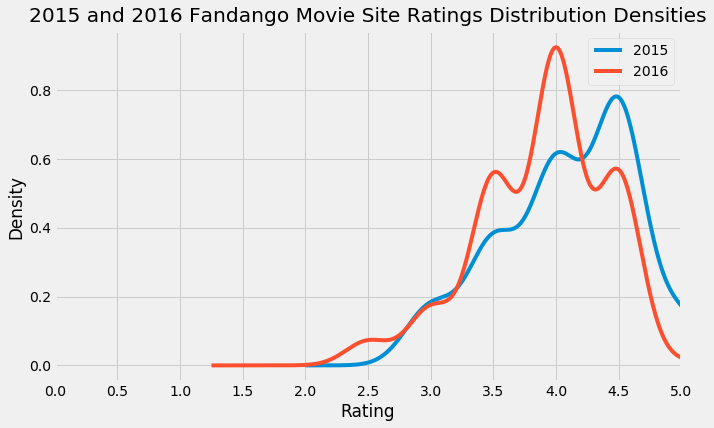

In [29]:
import matplotlib.pyplot as plt
from numpy import arange

%matplotlib inline

plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (10,6))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title("2015 and 2016 Fandango Movie Site Ratings Distribution Densities", y=1.01)
plt.xlabel('Rating')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

In [11]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [12]:
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [13]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

averages = pd.DataFrame()
averages['2015'] = [mean_2015, median_2015, mode_2015]
averages['2016'] = [mean_2016, median_2016, mode_2016]
averages.index = ['mean', 'median', 'mode']
averages

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


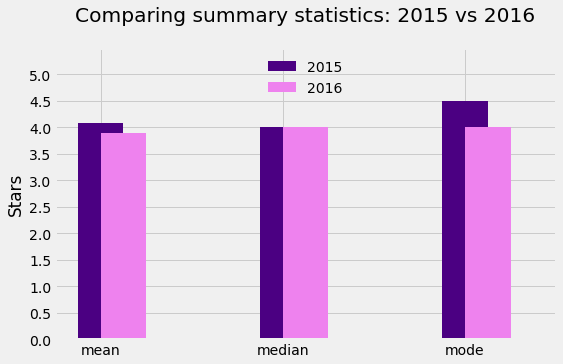

In [14]:
indigo = '#4b0082'
violet = '#ee82ee'

plt.style.use('fivethirtyeight')

averages['2015'].plot.bar(color=indigo, align = 'center', label = '2015', width = .25)
averages['2016'].plot.bar(color=violet, align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

## Data Analysis
Kernel Density Plot:<br/>
The kernel density plot illustrates that both datasets are left skewed, yet the 2016 plot clearly displays a more normal distribution centered around rating value 4.0. The question remains of why there are so few movies rated below 3.0 in either year. Could it be due to the sampling? Or could it be a bias of the site? These questions could be valuable for further research. In any case, there seems to be a downward shift in ratings in 2016.

Relative Frequency Tables:<br/>
In the 2015 frequency table, ratings of 4.5 or 5.0 appear with much higher frequency than in the 2016 frequency table. In the same vein, the lowest rating in 2015 is a 3.0, while the lowest rating in 2016 is a 2.5. These charts indicate a downward shift in ratings in 2016.

Double-bar Plot:<br/>
The median value for both years was the same, 4.0. The average decreased slightly from 2015 to 2016, and the most common value also decreased from 4.5 to 4.0. This indicates that there was a general downward trend in ratings from 2015 to 2016.

## Conclusion & Further Research
The question still remains as to whether or not Hickey's analysis really affected this change. Could it be that movies in 2015 received higher ratings on all sites? And why is there such a left skew in the datasets. Are viewers hesitant to leave bad reviews of movies? Does Fandango somehow generally only provide "good" quality movies on its website? Or did choosing the "popularity limit" of our movies have something to do with that bias? These questions are questions for further research. 

However, after today's task of reviewing the data, reworking the goal at hand, and visualizing the data, clearly a modest conclusion has emerged and answered my question: Yes, Fandango's movie rating scores clearly decreased from 2015 to 2016 after Hickey's analysis was published.